In [2]:
import numpy as np
from numpy import fft
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.restoration import inpaint
import scipy.signal as signal

In [3]:
def get_image(filename):
    # Read file it np array
    im = misc.imread(filename) 

    #plt.figure(figsize=(40,20))
    # Display with grayscale colour map 
    #plt.imshow(im,cmap=plt.cm.gray)

    # Show the image
    #plt.show()
    
    return im

In [4]:
im = get_image('images/desync1.pgm')

-2


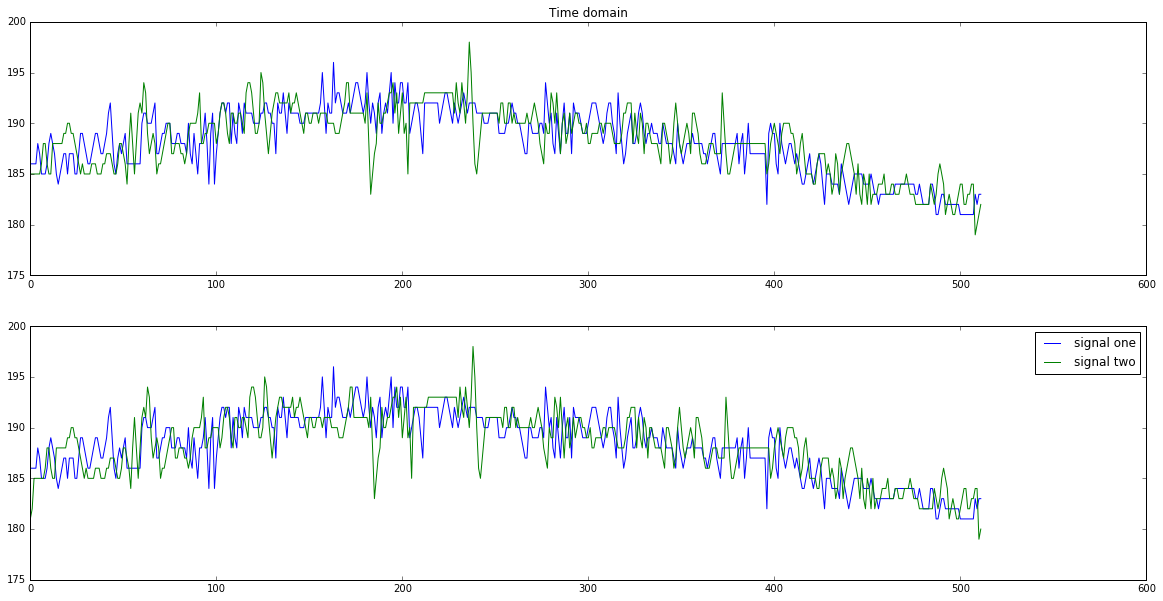

In [28]:
fig = plt.figure(figsize=(20,10))

#-----------------
# Create the input waveform in the time domain

samples = len(im[4])
increments = np.arange(samples)

#Make up a list of times in in a single period of 0 ->> 2*pi
times = increments

#Create the time domain signal with the required number of samples
signal_one = np.array(im[4])
signal_two = np.array(im[0])

#signal_one = np.array(im[1])
#signal_two = np.array(im[2])

fig.add_subplot(211)
plt.plot(  signal_one )
plt.plot(  signal_two )
plt.title('Time domain')

#-----------------
# Create the transform in the frequency domain


A = fft.fft(signal_one)
B = fft.fft(signal_two)
Ar = -A.conjugate()
Br = -B.conjugate()

idx = np.argmax(np.abs(fft.ifft(Ar*B)))

if idx > (len(im)-1)/2.:
    idx = -(len(im)-1-idx)

print(idx)

    
if idx == 0:
    plt.subplot(212)
    plt.plot(signal_one,label='signal one')
    plt.plot(signal_two,label='signal two')
    plt.plot([512,512],[250,250],'r--')
else:
    plt.subplot(212)
    plt.plot(signal_one,label='signal one')
    plt.plot([value for value in signal_two[idx:]]+list(signal_two[:idx]),label='signal two')


plt.legend()
plt.show()